# LeNet Lab Solution
![LeNet Architecture](lenet.png)
Source: Yan LeCun

## Load Data

Load the MNIST data, which comes pre-loaded with TensorFlow.

You do not need to modify this section.

In [41]:
'''
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("MNIST_data/", reshape=False)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels

assert(len(X_train) == len(y_train))
assert(len(X_validation) == len(y_validation))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))
'''

'\nfrom tensorflow.examples.tutorials.mnist import input_data\n\nmnist = input_data.read_data_sets("MNIST_data/", reshape=False)\nX_train, y_train           = mnist.train.images, mnist.train.labels\nX_validation, y_validation = mnist.validation.images, mnist.validation.labels\nX_test, y_test             = mnist.test.images, mnist.test.labels\n\nassert(len(X_train) == len(y_train))\nassert(len(X_validation) == len(y_validation))\nassert(len(X_test) == len(y_test))\n\nprint()\nprint("Image Shape: {}".format(X_train[0].shape))\nprint()\nprint("Training Set:   {} samples".format(len(X_train)))\nprint("Validation Set: {} samples".format(len(X_validation)))\nprint("Test Set:       {} samples".format(len(X_test)))\n'

The MNIST data that TensorFlow pre-loads comes as 28x28x1 images.

However, the LeNet architecture only accepts 32x32xC images, where C is the number of color channels.

In order to reformat the MNIST data into a shape that LeNet will accept, we pad the data with two rows of zeros on the top and bottom, and two columns of zeros on the left and right (28+2+2 = 32).

You do not need to modify this section.

In [42]:
import numpy as np
'''
# Pad images with 0s
X_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')
    
print("Updated Image Shape: {}".format(X_train[0].shape))
'''

'\n# Pad images with 0s\nX_train      = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), \'constant\')\nX_validation = np.pad(X_validation, ((0,0),(2,2),(2,2),(0,0)), \'constant\')\nX_test       = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), \'constant\')\n    \nprint("Updated Image Shape: {}".format(X_train[0].shape))\n'

In [43]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./traffic-signs-data/train.p"
validation_file="./traffic-signs-data/valid.p"
testing_file = "./traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("X_train.shape:", X_train.shape, ", y_train.shape:",y_train.shape)
print("X_valid.shape:", X_valid.shape, ", y_valid.shape:",y_valid.shape)
print("X_test.shape:", X_test.shape, ", y_test.shape:",y_test.shape)

X_train.shape: (34799, 32, 32, 3) , y_train.shape: (34799,)
X_valid.shape: (4410, 32, 32, 3) , y_valid.shape: (4410,)
X_test.shape: (12630, 32, 32, 3) , y_test.shape: (12630,)


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

6759 -> 19


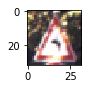

In [44]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

plt.figure(figsize=(1,1))
plt.imshow(image)
print(index,"->",y_train[index])

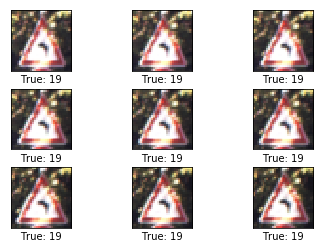

In [45]:
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true)
    img_shape = (images.shape[1], images.shape[2])
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        #ax.imshow(images[i].reshape(img_shape), cmap='binary')
        ax.imshow(images[i], cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()
    
plot_images(X_train[index:index+9], y_train[index:index+9])

threeChannels shape: (32, 32, 3) , type: <class 'numpy.ndarray'> -> uint8


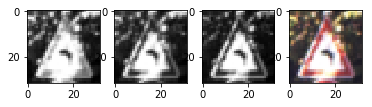

6759 -> 19 , shape: (32, 32)
cannyEdges shape: (32, 32)
fourChannels shape: (32, 32, 4)


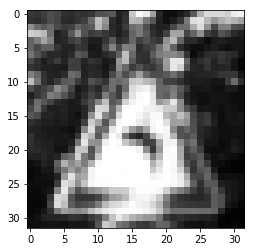

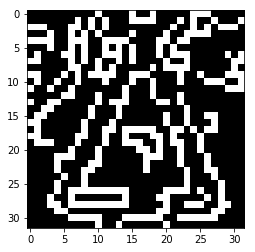

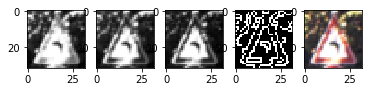

In [46]:
import cv2

def convertToGrayscale(image):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    (assuming your grayscaled image is called 'gray')
    you should call plt.imshow(gray, cmap='gray')"""
    # return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Or use BGR2GRAY if you read an image with cv2.imread()
    return cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

def findCannyEdges(img, low_threshold, high_threshold):
    """Applies the Canny transform"""
    return cv2.Canny(img, low_threshold, high_threshold)

def findHoughLines(img, rho, theta, threshold, min_line_len, max_line_gap):
    """
    `img` should be the output of a Canny transform.
        
    Returns an image with hough lines drawn.
    """
    #Python: cv2.HoughLinesP(image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]) → lines
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]), minLineLength=min_line_len, maxLineGap=max_line_gap)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    drawLines(line_img, lines)
    return lines, line_img

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def combineImages(img, initial_img, α=0.8, β=1., λ=0.):
    """
    `img` is the output of the hough_lines(), An image with lines drawn on it.
    Should be a blank image (all black) with lines drawn on it.
    
    `initial_img` should be the image before any processing.
    
    The result image is computed as follows:
    
    initial_img * α + img * β + λ
    NOTE: initial_img and img must be the same shape!
    """
    return cv2.addWeighted(initial_img, α, img, β, λ)

threeChannels= X_train[index].copy()
print("threeChannels shape:",threeChannels.shape,", type:",type(threeChannels),"->", threeChannels.dtype)
plt.figure(1)
plt.subplot(1,4,1)
plt.imshow(threeChannels[:,:,0], cmap='gray')
plt.subplot(1,4,2)
plt.imshow(threeChannels[:,:,1], cmap='gray')
plt.subplot(1,4,3)
plt.imshow(threeChannels[:,:,2], cmap='gray')
plt.subplot(1,4,4)
plt.imshow(threeChannels)
plt.show()
#print("threeChannels:",threeChannels)

grayscaleImage=convertToGrayscale(threeChannels)
plt.figure(2)
plt.imshow(grayscaleImage, cmap='gray')
#plt.imshow(X_train[index])
print(index,"->",y_train[index],", shape:", grayscaleImage.shape)
cannyEdges=findCannyEdges(grayscaleImage, 0, 255)
print("cannyEdges shape:", cannyEdges.shape)
plt.figure(3)
plt.imshow(cannyEdges, cmap='gray')
fourChannels=np.ndarray([32,32,4], dtype=np.uint8)
fourChannels[:,:,0:3]=threeChannels[:,:,:]
fourChannels[:,:,3]=cannyEdges
print("fourChannels shape:",fourChannels.shape)
#print("fourChannels:",fourChannels)
plt.figure(4)
plt.subplot(1,5,1)
plt.imshow(fourChannels[:,:,0], cmap='gray')
plt.subplot(1,5,2)
plt.imshow(fourChannels[:,:,1], cmap='gray')
plt.subplot(1,5,3)
plt.imshow(fourChannels[:,:,2], cmap='gray')
plt.subplot(1,5,4)
plt.imshow(fourChannels[:,:,3], cmap='gray')
plt.subplot(1,5,5)
plt.imshow(fourChannels[:,:,0:3])
plt.show()


fourChannelImages shape: (34799, 32, 32, 4)


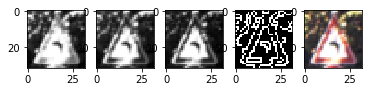

X_train shape: (34799, 32, 32, 4) , INPUT_CHANNELS: 4


In [47]:
def addCannyChannel(images):
    #print("images shape:", images.shape)
    numberOfImages=images.shape[0]
    fourChannels=np.ndarray([numberOfImages,32,32,4], dtype=np.uint8)
    fourChannels[:,:,:,0:3]=images[:,:,:,:]
    for imageNumber in range(numberOfImages):
        grayscaleImage=convertToGrayscale(images[imageNumber])
        cannyEdges=findCannyEdges(grayscaleImage, 0, 255)
        fourChannels[imageNumber,:,:,3]=cannyEdges
    return fourChannels

fourChannelImages=addCannyChannel(X_train)
print("fourChannelImages shape:",fourChannelImages.shape)
plt.figure(1)
plt.subplot(1,5,1)
plt.imshow(fourChannelImages[index,:,:,0], cmap='gray')
plt.subplot(1,5,2)
plt.imshow(fourChannelImages[index,:,:,1], cmap='gray')
plt.subplot(1,5,3)
plt.imshow(fourChannelImages[index,:,:,2], cmap='gray')
plt.subplot(1,5,4)
plt.imshow(fourChannelImages[index,:,:,3], cmap='gray')
plt.subplot(1,5,5)
plt.imshow(fourChannelImages[index,:,:,0:3])
plt.show()

X_train=fourChannelImages
INPUT_CHANNELS=len(X_train.shape)
print("X_train shape:",X_train.shape,", INPUT_CHANNELS:", INPUT_CHANNELS)


## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [153]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [154]:
import tensorflow as tf

EPOCHS = 10
BATCH_SIZE = 128

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [155]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x4. Output = 28x28x12.
    LAYER1_CHANNELS=16
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, INPUT_CHANNELS, LAYER1_CHANNELS), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(LAYER1_CHANNELS))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # tf.nn.local_response_normalization(input, depth_radius=None, bias=None, alpha=None, beta=None, name=None)
    conv1 = tf.nn.local_response_normalization(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x32.
    LAYER2_CHANNELS=16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, LAYER1_CHANNELS, LAYER2_CHANNELS), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(LAYER2_CHANNELS))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    conv2 = tf.nn.local_response_normalization(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(5*5*LAYER2_CHANNELS, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1= tf.nn.dropout(fc1, keep_prob)
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2= tf.nn.dropout(fc2, keep_prob)
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify [MNIST](http://yann.lecun.com/exdb/mnist/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [156]:
x = tf.placeholder(tf.float32, (None, 32, 32, CHANNELS))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

keep_prob = tf.placeholder(tf.float32)

## Training Pipeline
Create a training pipeline that uses the model to classify MNIST data.

You do not need to modify this section.

In [157]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [158]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    #print("X_data:",X_data," x:", x)
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        #print("batch_x shape:",batch_x.shape," x:", x)
        # validation images do not have a 4th channel & the x placeholder is being reused and has a 4th channel
        if INPUT_CHANNELS > 3:
            accuracy = sess.run(accuracy_operation, feed_dict={x: addCannyChannel(batch_x), y: batch_y, keep_prob: 1.})
        else:
            accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [159]:
with tf.Session() as sess:
    keepProbability=.75
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keepProbability})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.644

EPOCH 2 ...
Validation Accuracy = 0.856

EPOCH 3 ...
Validation Accuracy = 0.897

EPOCH 4 ...
Validation Accuracy = 0.914

EPOCH 5 ...
Validation Accuracy = 0.926

EPOCH 6 ...
Validation Accuracy = 0.936

EPOCH 7 ...
Validation Accuracy = 0.945

EPOCH 8 ...
Validation Accuracy = 0.941

EPOCH 9 ...
Validation Accuracy = 0.955

EPOCH 10 ...
Validation Accuracy = 0.953

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))